**Importing libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Importing the csv**

In [66]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


- **checking for null values**

In [67]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

- **Cleaning and manipulation**

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [69]:
#checking for number of unique job titles.
df.job_title.nunique()

93

In [70]:
#checking for number of unique loctions
df.company_location.nunique()

72

In [71]:
#checking for years in the data.
df.work_year.unique()

array([2023, 2022, 2020, 2021], dtype=int64)

**Analysing the job_title column**

In [101]:
yr = df.groupby('work_year')['job_title'].count()
yr

work_year
2020      76
2021     230
2022    1664
2023    1785
Name: job_title, dtype: int64

In [102]:
#Finding the %increase between 2020 and 2023.
round((((yr[2023].sum() - yr[2020].sum()) / yr[2020].sum()) * 100),2)

2248.68

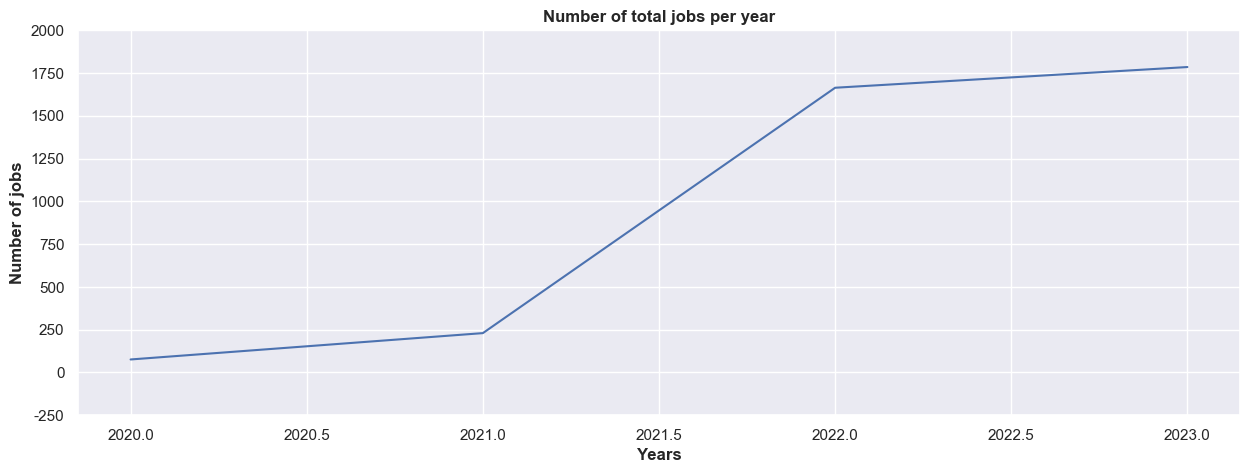

In [129]:
#plotting line graph 
plt.figure(figsize = (15,5))
plt.plot(yr.index,
         yr.values)
plt.ylabel('Number of jobs', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Number of total jobs per year', fontsize = 12, fontweight = 'bold')
plt.show()

In [105]:
#Finding difference in Job salaries.
Job_sal = df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False)
Job_sal

job_title
Data Engineer                148497164
Data Scientist               118330603
Data Analyst                  66534331
Machine Learning Engineer     44705620
Data Architect                16333091
                               ...    
Principal Data Architect         38154
Compliance Data Analyst          30000
Staff Data Analyst               15000
Product Data Scientist            8000
Power BI Developer                5409
Name: salary_in_usd, Length: 93, dtype: int64

In [106]:
#Highest paying job 
Job_sal.head(1)

job_title
Data Engineer    148497164
Name: salary_in_usd, dtype: int64

In [108]:
#Lowest paying job 
Job_sal.tail(1)

job_title
Power BI Developer    5409
Name: salary_in_usd, dtype: int64

In [12]:
top_5_salaries = df.groupby('job_title')['salary_in_usd'].sum().sort_values(ascending=False).head(5)
top_5_salaries

job_title
Data Engineer                148497164
Data Scientist               118330603
Data Analyst                  66534331
Machine Learning Engineer     44705620
Data Architect                16333091
Name: salary_in_usd, dtype: int64

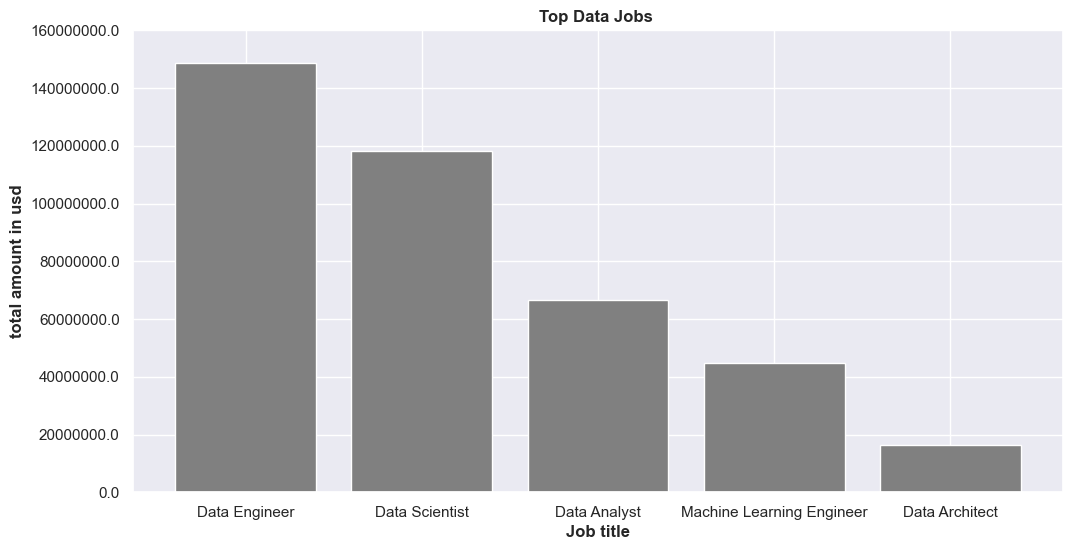

In [13]:
#plotting top_5 total salaries per job_title
plt.figure(figsize=(12,6))
plt.bar(x= top_5_salaries.index,
        height= top_5_salaries.values,
        color = 'Grey')
plt.yticks(ticks=plt.yticks()[0],labels=plt.yticks()[0] )
plt.xlabel('Job title', weight= 'bold')
plt.ylabel('total amount in usd', weight= 'bold')
plt.title('Top Data Jobs ', fontsize = 12, weight ='bold')
plt.show()

In [136]:
# Finding the period in which the demand for Data engineers increased.
DE = df[df['job_title'] == 'Data Engineer'].groupby('work_year').count()
DE_count = DE.job_title
DE_count

work_year
2020     15
2021     38
2022    488
2023    499
Name: job_title, dtype: int64

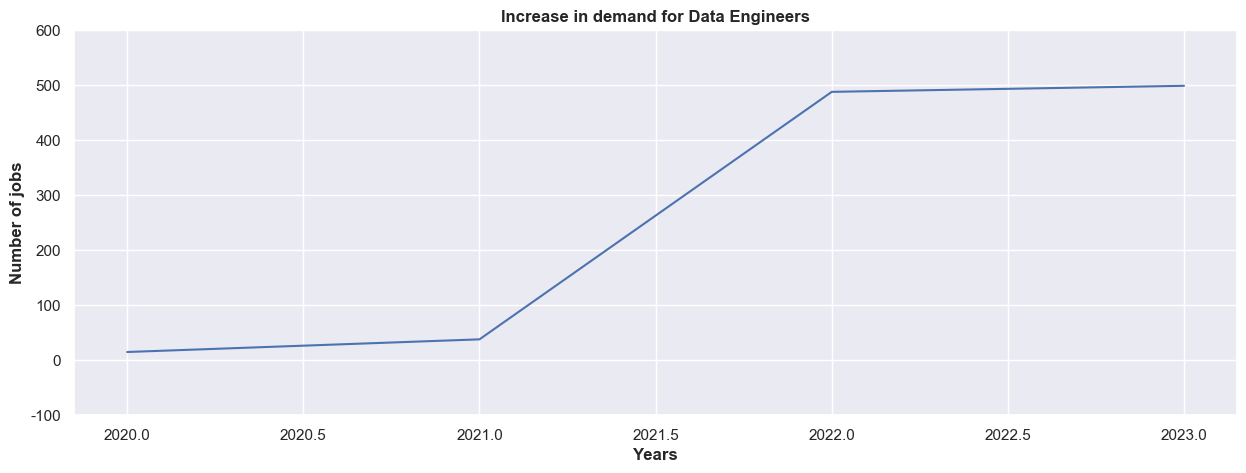

In [139]:
#plotting a line graph to determine the increase in deamnd for Data Engineers 
plt.figure(figsize = (15,5))
plt.plot(DE_count.index,
         DE_count.values)
plt.ylabel('Number of jobs', fontweight = 'bold')
plt.xlabel('Years', fontweight = 'bold')
plt.yticks(ticks=plt.yticks()[0], labels=plt.yticks()[0].astype(int))
plt.title('Increase in demand for Data Engineers', fontsize = 12, fontweight = 'bold')
plt.show()

In [14]:
#checking total amount paid to data engineers across different locations
DE = df[df.job_title == 'Data Engineer']
DE_location = DE.groupby('company_location')['salary_in_usd'].sum().sort_values(ascending= False)
DE_location


company_location
US    138587808
GB      4534515
ES      1236672
CA      1185200
GR       473417
DE       379559
PR       335000
PT       322694
LT       189624
NL       175020
MX       165511
FR       135280
IN       131683
SI       123405
BR       120000
IE       101943
AU        75050
AT        74130
JP        41689
TR        40119
PL        28476
MT        28369
VN        12000
Name: salary_in_usd, dtype: int64

**Analysing the Company_location column**

In [141]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [142]:
#Checking the number of unique locations
df.company_location.unique()

array(['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'NL', 'CH', 'CF',
       'FR', 'FI', 'UA', 'IE', 'IL', 'GH', 'CO', 'SG', 'AU', 'SE', 'SI',
       'MX', 'BR', 'PT', 'RU', 'TH', 'HR', 'VN', 'EE', 'AM', 'BA', 'KE',
       'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'PL', 'AL', 'AR', 'LT',
       'AS', 'CR', 'IR', 'BS', 'HU', 'AT', 'SK', 'CZ', 'TR', 'PR', 'DK',
       'BO', 'PH', 'BE', 'ID', 'EG', 'AE', 'LU', 'MY', 'HN', 'JP', 'DZ',
       'IQ', 'CN', 'NZ', 'CL', 'MD', 'MT'], dtype=object)

In [146]:
#Location with the highest number of employees.
Loc_emp = df.groupby('company_location')['job_title'].count().sort_values(ascending = False).head(5)
Loc_emp

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
Name: job_title, dtype: int64

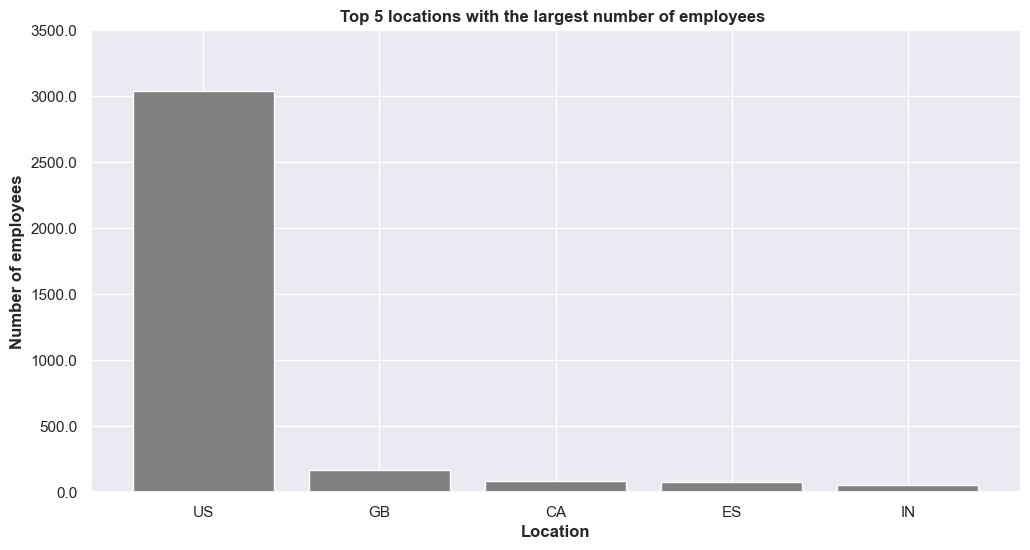

In [152]:
#Plotting a bar graph.

plt.figure(figsize=(12,6))
plt.bar(x= Loc_emp.index,
        height= Loc_emp.values,
        color = 'Grey')
plt.yticks(ticks=plt.yticks()[0],labels=plt.yticks()[0] )
plt.xlabel('Location', weight= 'bold')
plt.ylabel('Number of employees', weight= 'bold')
plt.title('Top 5 locations with the largest number of employees ', fontsize = 12, weight ='bold')
plt.show()

**Analysing company_size column**

In [156]:
#checking number of employees in each company.
comp_no = df.groupby('company_size')['job_title'].count().sort_values(ascending= False)
comp_no

company_size
M    3153
L     454
S     148
Name: job_title, dtype: int64

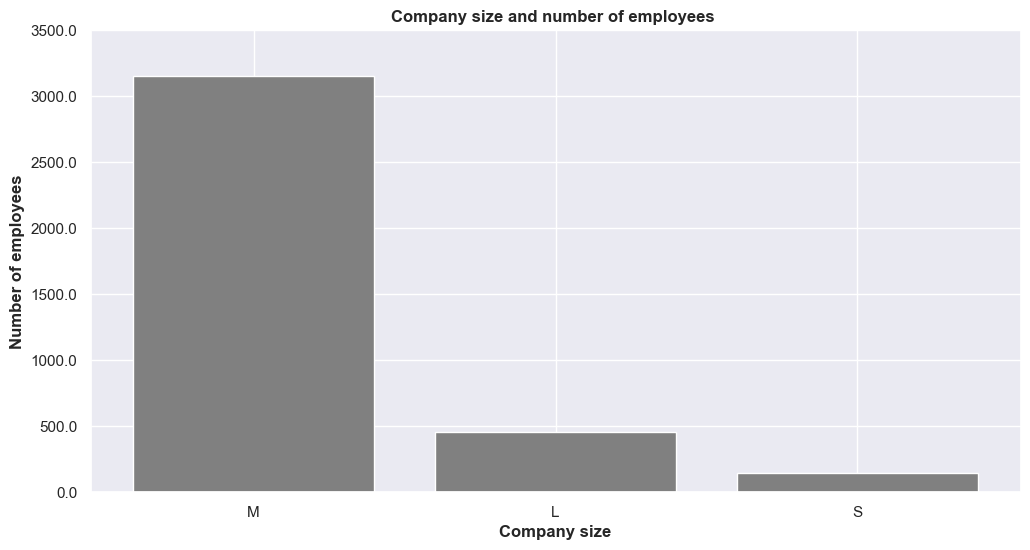

In [157]:
#Plotting a bar graph.

plt.figure(figsize=(12,6))
plt.bar(x= comp_no.index,
        height= comp_no.values,
        color = 'Grey')
plt.yticks(ticks=plt.yticks()[0],labels=plt.yticks()[0] )
plt.xlabel('Company size', weight= 'bold')
plt.ylabel('Number of employees', weight= 'bold')
plt.title('Company size and number of employees ', fontsize = 12, weight ='bold')
plt.show()

In [158]:
#Checking which company spends more on employees.
comp_sal = df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending= False)
comp_sal

company_size
M    451290619
L     53708646
S     11577549
Name: salary_in_usd, dtype: int64

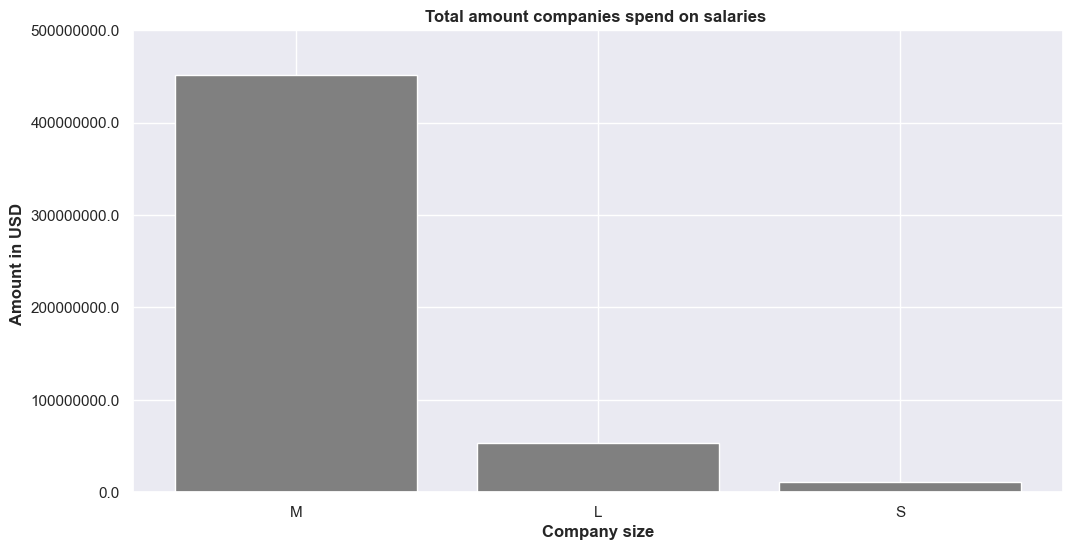

In [159]:
#Plotting a bar graph.

plt.figure(figsize=(12,6))
plt.bar(x= comp_sal.index,
        height= comp_sal.values,
        color = 'Grey')
plt.yticks(ticks=plt.yticks()[0],labels=plt.yticks()[0] )
plt.xlabel('Company size', weight= 'bold')
plt.ylabel('Amount in USD ', weight= 'bold')
plt.title('Total amount companies spend on salaries ', fontsize = 12, weight ='bold')
plt.show()

Text(0.5, 1.0, 'correlation between company_size, salary and experience_level')

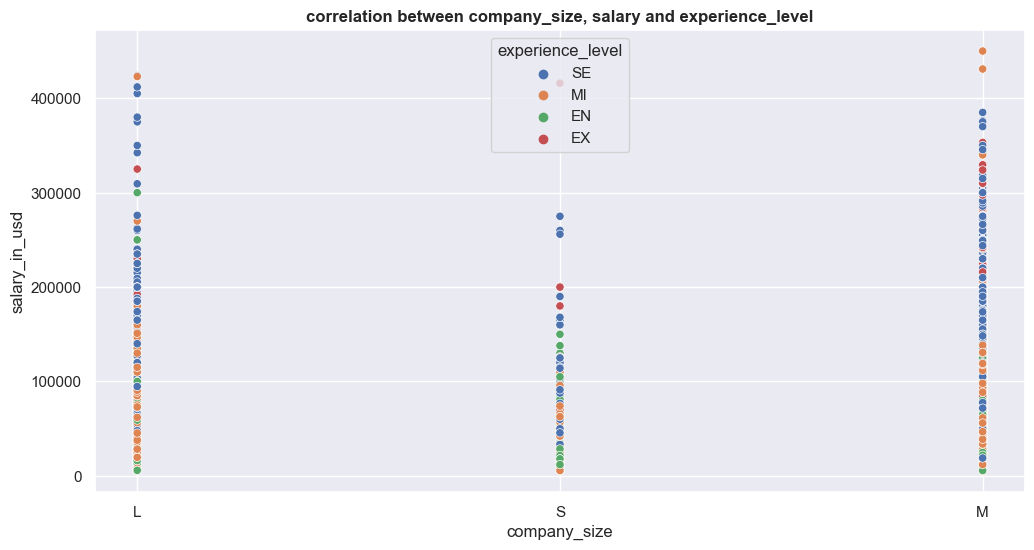

In [155]:
#Plotting a scatter plot to confirm correlation between company_size, salary and experience level.
plt.figure(figsize= (12,6))
sns.scatterplot(x= 'company_size', y= 'salary_in_usd', data= df, hue= 'experience_level')
plt.title('correlation between company_size, salary and experience_level', weight = 'bold', fontsize = 12)

**Analysing work year column**

In [24]:
yr_sal_comp = df.groupby('work_year')['salary_in_usd'].sum()
yr_sal_comp

work_year
2020      7015000
2021     21640058
2022    221875465
2023    266046291
Name: salary_in_usd, dtype: int64

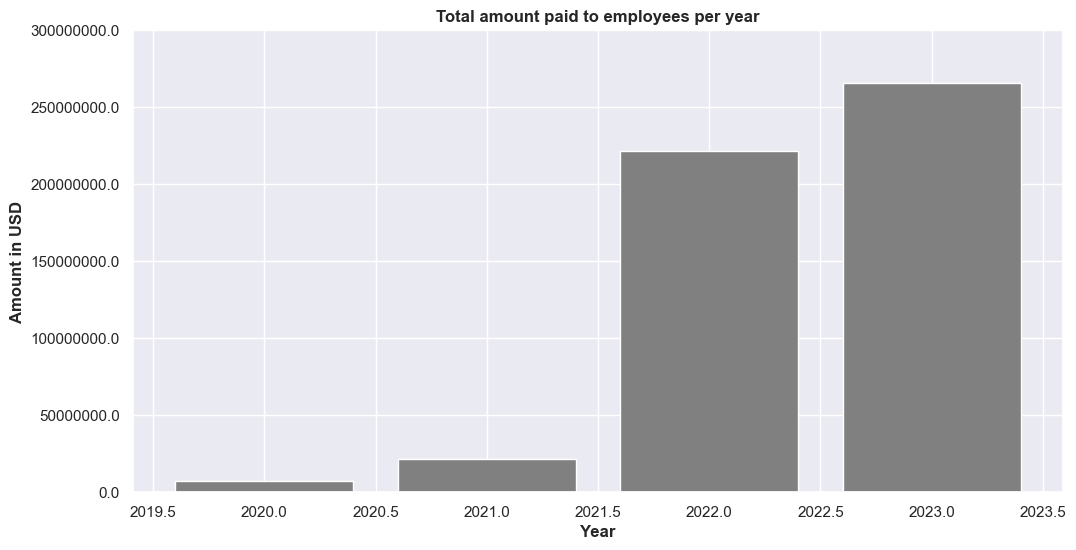

In [166]:
#plotting a line graph.

plt.figure(figsize = (12,6))
plt.bar(x = yr_sal_comp.index,
        height = yr_sal_comp.values,
        color = 'Grey')
plt.yticks(ticks = plt.yticks()[0],
           labels = plt.yticks()[0])
plt.xlabel('Year', weight = 'bold')
plt.ylabel('Amount in USD', weight = 'bold')
plt.title('Total amount paid to employees per year', weight = 'bold', fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Correlation between yearly company spending and number of jobs per year')

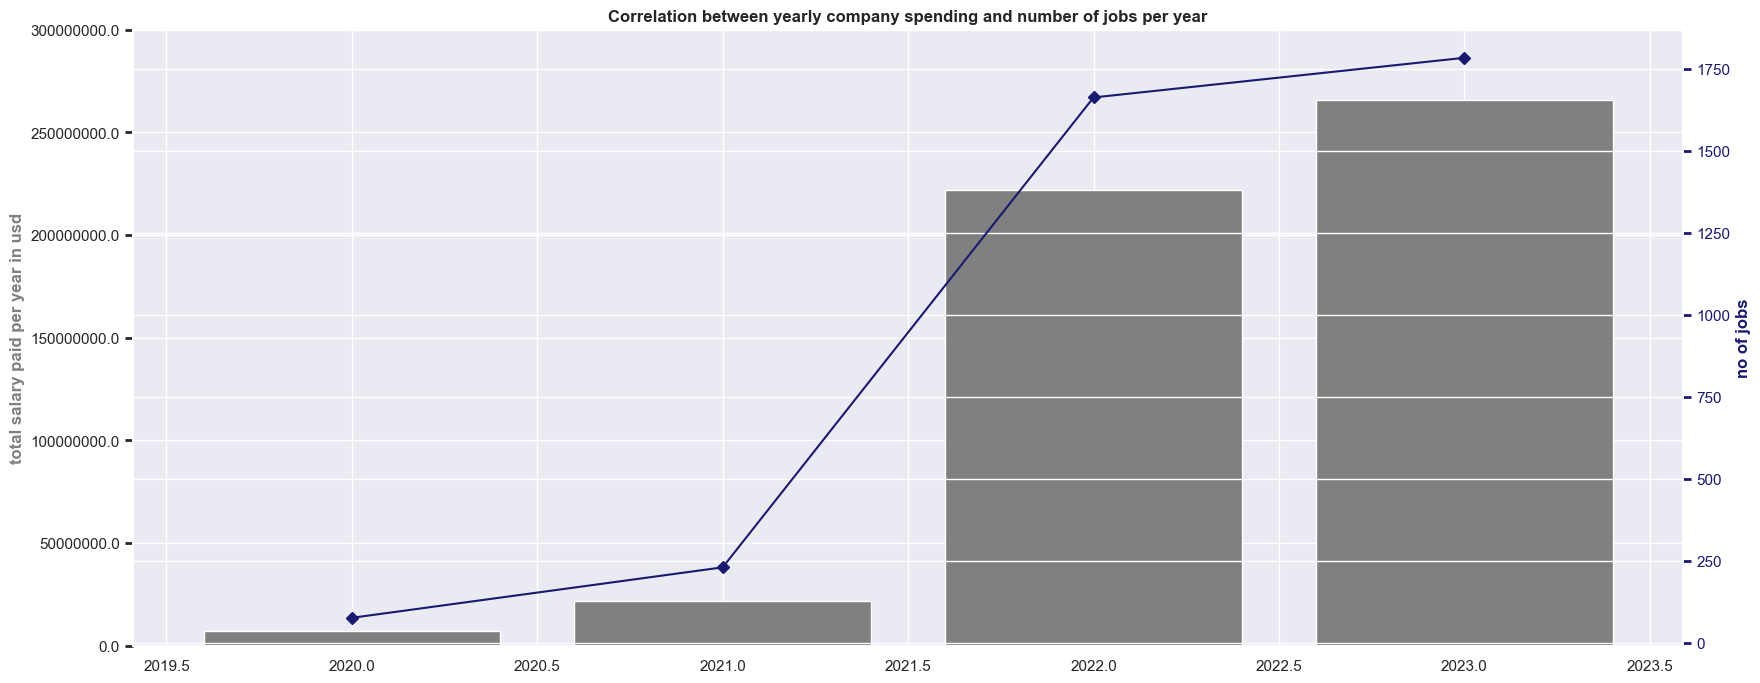

In [167]:
#plotting a bar and line graph to observe any correlation.

fig, ax = plt.subplots(figsize = (20,8))

ax.bar(yr_sal_comp.index,
       yr_sal_comp.values,
       color = 'Grey')
ax.set_yticks(ticks = plt.yticks()[0],
           labels = plt.yticks()[0])
ax.set_ylabel('total salary paid per year in usd', 
              weight = 'bold',
              color = 'Grey')
ax.tick_params(axis = 'y',
               width = 2)
ax1 = ax.twinx()
ax1.plot(yr.index,
         yr.values,
         color = 'Midnightblue',
         marker = 'D')
ax1.set_ylabel('no of jobs', 
               weight = 'bold',
               color = 'Midnightblue')
ax1.tick_params(axis = 'y',
                width = 2,
                colors = 'Midnightblue')
plt.title('Correlation between yearly company spending and number of jobs per year', weight ='bold', fontsize = 12)

**Analysing experience level column**

In [29]:
exp_lvl = df.experience_level.value_counts()
exp_lvl

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

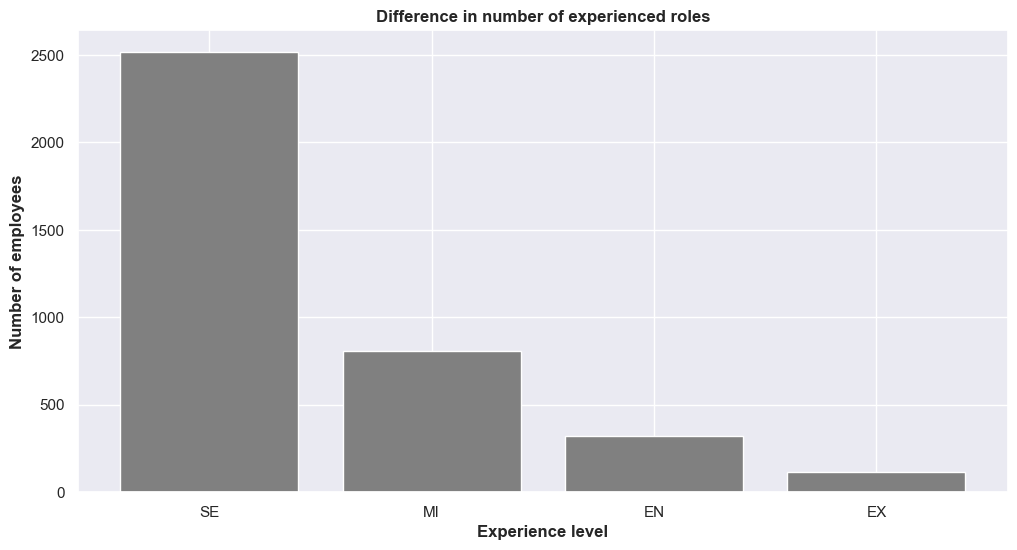

In [168]:
#plotting a bar graph.

plt.figure(figsize = (12,6))
plt.bar(x = exp_lvl.index,
        height = exp_lvl.values,
        color = 'Grey')
plt.xlabel('Experience level', weight = 'bold')
plt.ylabel('Number of employees', weight =  'bold')
plt.title('Difference in number of experienced roles', fontsize = 12, weight = 'bold')
plt.show()

In [171]:
#checking which jobs titles take up the SE(senior role)
exp = df.groupby('experience_level')['job_title'].value_counts().sort_values(ascending = False)
exp

experience_level  job_title                
SE                Data Engineer                718
                  Data Scientist               608
                  Data Analyst                 380
                  Machine Learning Engineer    209
MI                Data Engineer                205
                                              ... 
EN                Data Specialist                1
                  Data Quality Analyst           1
                  Data Analytics Consultant      1
                  Compliance Data Analyst        1
SE                Staff Data Scientist           1
Name: job_title, Length: 192, dtype: int64

In [176]:
#Senior level
exp['SE'].head(10)

job_title
Data Engineer                718
Data Scientist               608
Data Analyst                 380
Machine Learning Engineer    209
Data Architect                92
Analytics Engineer            81
Applied Scientist             52
Research Scientist            49
Data Science Manager          45
Research Engineer             22
Name: job_title, dtype: int64

In [175]:
#Middle level
exp['MI'].head(10)

job_title
Data Engineer                 205
Data Analyst                  167
Data Scientist                161
Machine Learning Engineer      59
Research Scientist             23
Analytics Engineer             13
Machine Learning Scientist     11
ML Engineer                    11
Data Science Manager            8
Data Analytics Manager          8
Name: job_title, dtype: int64

In [177]:
#Entry level
exp['EN'].head(10)

job_title
Data Engineer                66
Data Analyst                 63
Data Scientist               59
Machine Learning Engineer    21
Research Engineer            10
Research Scientist            9
AI Scientist                  7
Data Science Consultant       7
Applied Scientist             6
AI Developer                  6
Name: job_title, dtype: int64

**Analysing employment_type column**

In [194]:
df.employment_type.value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [195]:
emp_type_sal = df.groupby('employment_type')['salary_in_usd'].sum()
emp_type_sal

employment_type
CT      1134469
FL       518078
FT    514252194
PT       672073
Name: salary_in_usd, dtype: int64

In [186]:
emp_type = df.groupby('employment_type')['job_title'].value_counts().sort_values(ascending = False)
emp_type

employment_type  job_title                
FT               Data Engineer                1037
                 Data Scientist                836
                 Data Analyst                  606
                 Machine Learning Engineer     288
                 Analytics Engineer            102
                                              ... 
                 Azure Data Engineer             1
                 BI Data Engineer                1
                 Cloud Data Architect            1
                 Compliance Data Analyst         1
PT               ML Engineer                     1
Name: job_title, Length: 119, dtype: int64

In [187]:
emp_type['FT'].head(10)

job_title
Data Engineer                1037
Data Scientist                836
Data Analyst                  606
Machine Learning Engineer     288
Analytics Engineer            102
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: job_title, dtype: int64

In [188]:
emp_type['CT'].head(10)

job_title
ML Engineer                           3
Analytics Engineer                    1
Business Data Analyst                 1
Applied Machine Learning Scientist    1
Staff Data Scientist                  1
Principal Data Scientist              1
NLP Engineer                          1
Data Analyst                          1
Name: job_title, dtype: int64

In [189]:
emp_type['PT'].head(10)

job_title
Data Analyst                         5
Data Scientist                       3
AI Scientist                         2
Data Engineer                        2
3D Computer Vision Researcher        1
BI Analyst                           1
Computer Vision Engineer             1
Computer Vision Software Engineer    1
ML Engineer                          1
Name: job_title, dtype: int64

# END 